In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import files

uploaded = files.upload()

In [3]:
from google.colab import files

uploaded = files.upload()

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [5]:
train_df.shape

(891, 12)

In [6]:
test_df.shape

(418, 11)

In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

- Continous: Age, Fare. Discrete: SibSp, Parch.

In [8]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
train_df.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**- Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.**

**- Cabin > Age are incomplete in case of test dataset.**

**- Seven features are integer or floats. Six in case of test dataset.**

**- Five features are strings (object).**

In [11]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [12]:
train_df = train_df.fillna(train_df.mean())
print(train_df.mean())
train_df.isnull().sum()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


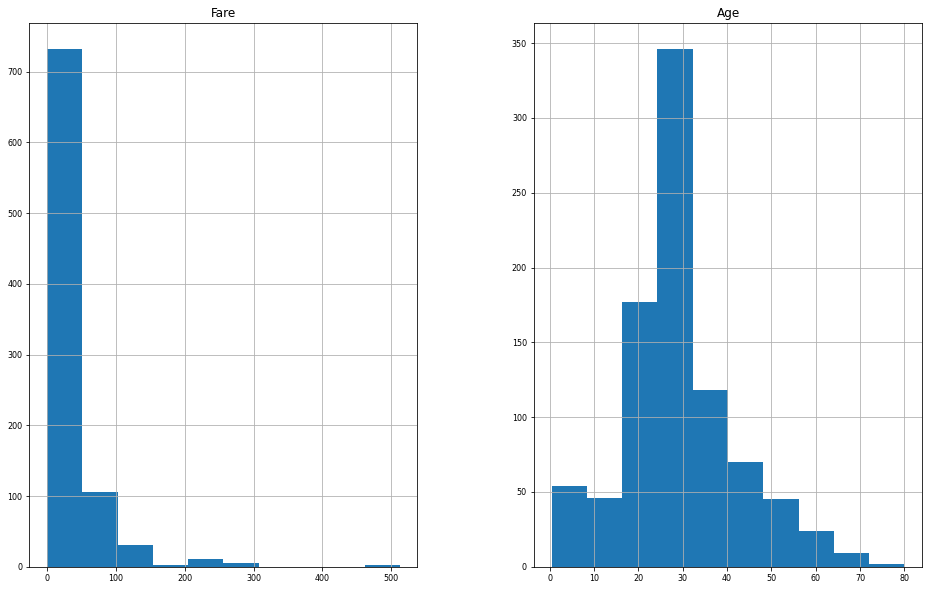

In [14]:
train_df[['Fare', 'Age']].hist(figsize=(16, 10), xlabelsize=8, ylabelsize=8);

In [15]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
train_df.pivot_table(['Survived'], ['Sex']).sort_values(by = ['Survived'], ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
train_df.pivot_table(['Survived'], ['Sex', 'Pclass']).sort_values(by = ['Survived'], ascending = False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [18]:
Alone = [0 for k in range(len(train_df))]
for p in range(len(train_df)):
    if train_df['SibSp'][p] == 0 and train_df['Parch'][p] == 0:
        Alone[p] = 1

In [19]:
train_df = train_df.assign(IsAlone =Alone)
train_df['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [20]:
train_df.pivot_table(['Survived'], ['IsAlone']).sort_values(by = ['Survived'], ascending = False)

,Survived
IsAlone,
0,0.505650
1,0.303538


In [21]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsAlone
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.135207
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.179775
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.584471
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.583398
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.271832
IsAlone,0.057462,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,1.000000


In [22]:
df_corr = train_df[['Survived', 'Age', 'Fare']]
df_corr.loc[:, 'Age'] = df_corr.loc[:, 'Age'].round()
corr = df_corr.corr()['Survived'][1:]
print ('Korelasi dengan variable Survived: ', '\n', corr)

Korelasi dengan variable Survived:  
 Age    -0.070324
Fare    0.257307
Name: Survived, dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


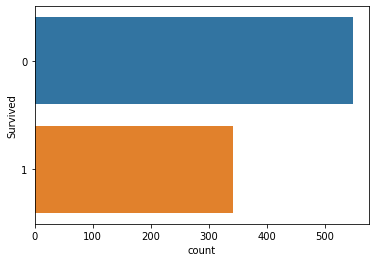

In [23]:
sns.countplot(y = 'Survived', data = train_df);

In [24]:
train_df.pivot_table(['Survived'], ['Sex', 'Pclass']).sort_values(by = ['Survived'], ascending = False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

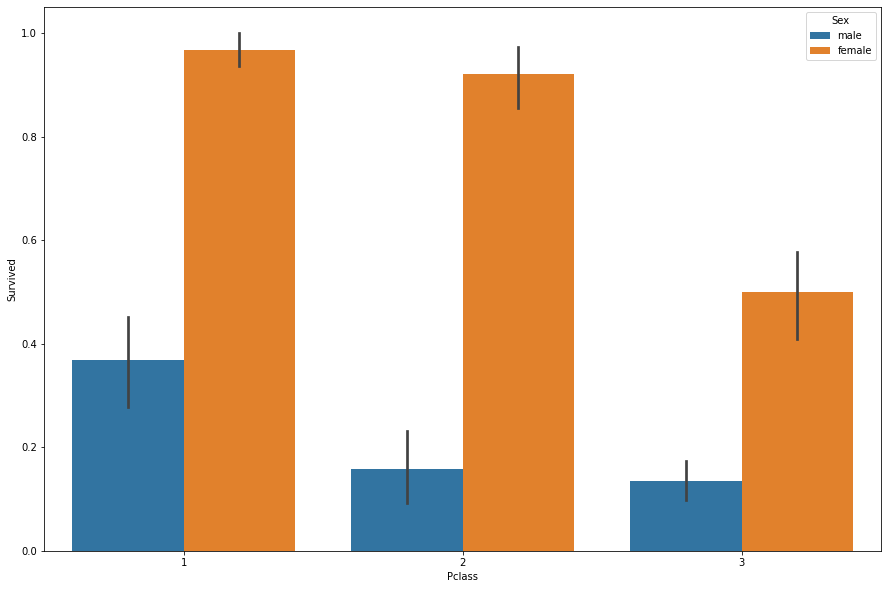

In [25]:
fig, ax = plt.subplots(1, 1, figsize  =(15,10))
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train_df, ax = ax);

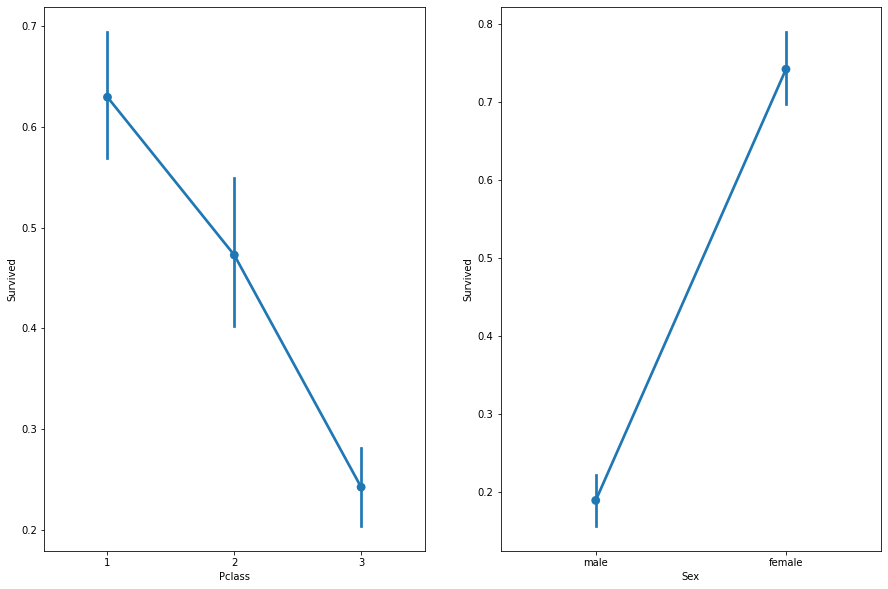

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,10))
sns.pointplot(x = 'Pclass', y = 'Survived', data = train_df, ax = ax1)
sns.pointplot(x = 'Sex', y = 'Survived', data = train_df, ax = ax2);

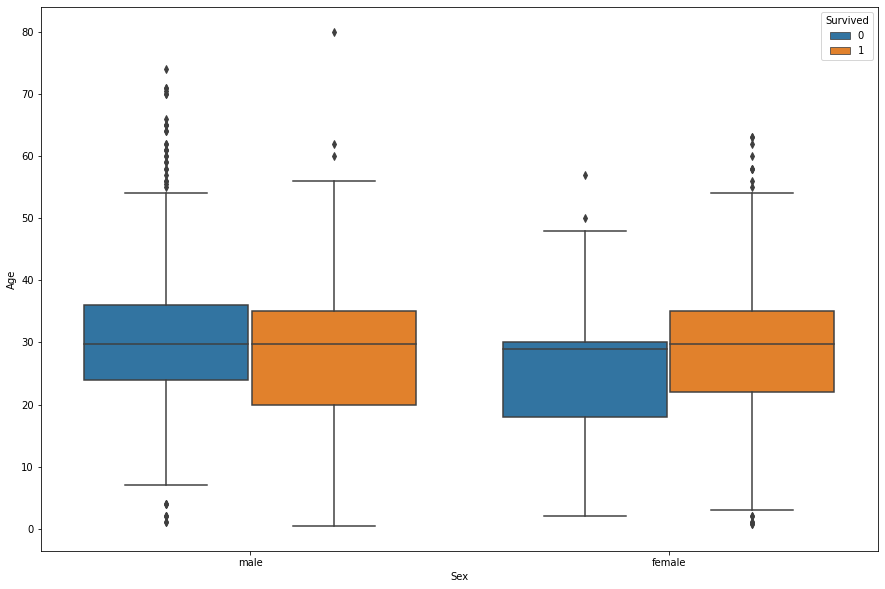

In [27]:
fig, ax = plt.subplots(1, 1, figsize  =(15,10))
sns.boxplot(x='Sex', y='Age', data=train_df, hue="Survived");

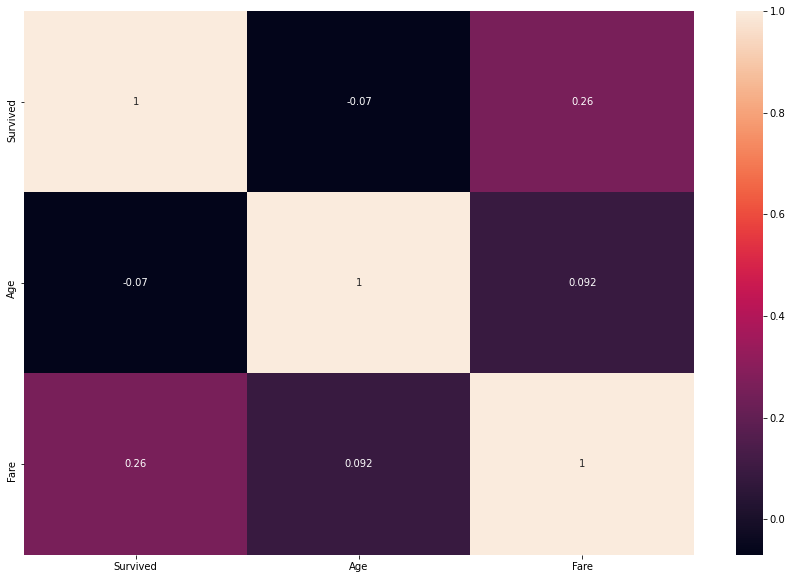

In [28]:
df_corr = train_df[['Survived', 'Age', 'Fare']]
fig, ax = plt.subplots(1, 1, figsize = (15,10))
sns.heatmap(df_corr.corr(), annot = True)

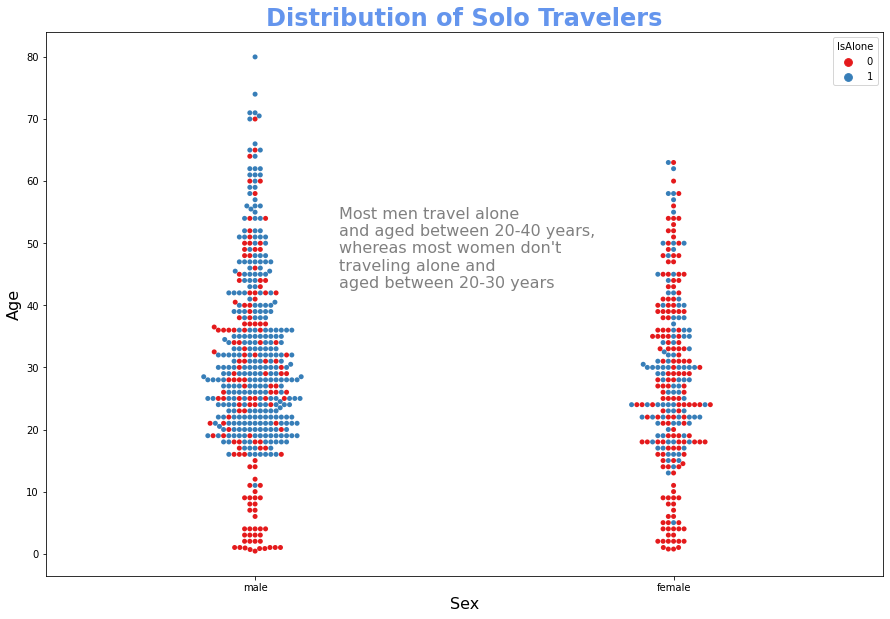

In [29]:
train_df = pd.read_csv('train.csv')
Alone = [0 for k in range(len(train_df))]
for p in range(len(train_df)):
    if train_df['SibSp'][p] == 0 and train_df['Parch'][p] == 0:
        Alone[p] = 1

train_df = train_df.assign(IsAlone =Alone)
train_df['IsAlone'].value_counts()

fig, ax = plt.subplots(1, 1, figsize  =(15,10))
sns.swarmplot(x='Sex', y='Age', data=train_df, hue='IsAlone', palette='Set1')

insight = '''
Most men travel alone
and aged between 20-40 years,
whereas most women don't
traveling alone and
aged between 20-30 years
'''

ax.text(0.5,85,'Distribution of Solo Travelers',horizontalalignment='center',color='cornflowerblue',fontsize=24,fontweight='bold')
ax.text(0.2,40,insight,horizontalalignment='left',color='grey',fontsize=16,fontweight='normal')
ax.set_xlabel('Sex', fontsize=16)
ax.set_ylabel('Age', fontsize=16);

In [30]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'IsAlone'],
      dtype='object')

In [31]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)


train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 13) (418, 11) (891, 12) (418, 11)


('After', (891, 11), (418, 9), (891, 11), (418, 9))

### Creating new feature extracting from existing

In the following code we extract Title feature using regular expressions. The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

When I plot Title, Age, and Survived, we note the following observations.

- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).
- So I have decided to retain the new Title feature for model training.

In [32]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [33]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [34]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [35]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 9))

### Converting a categorical feature

Starting by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [36]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,Title
0,0,3,0,22.0,1,0,7.2500,S,0,1
1,1,1,1,38.0,1,0,71.2833,C,0,3
2,1,3,1,26.0,0,0,7.9250,S,1,2
3,1,1,1,35.0,1,0,53.1000,S,0,3
4,0,3,0,35.0,0,0,8.0500,S,1,1


### Completing a numerical continuous feature

Now estimating and completing features with missing or null values.first doing this for the Age feature.

There is correlation among Age, Gender, and Pclass. So Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


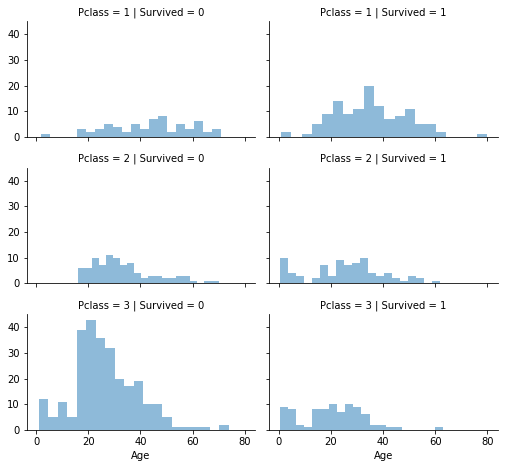

In [37]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [38]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [39]:
#Now iterating over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,Title
0,0,3,0,22,1,0,7.2500,S,0,1
1,1,1,1,38,1,0,71.2833,C,0,3
2,1,3,1,26,0,0,7.9250,S,1,2
3,1,1,1,35,1,0,53.1000,S,0,3
4,0,3,0,35,0,0,8.0500,S,1,1


In [40]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [42]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,0,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,1,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,1,"(32.0, 48.0]"


In [43]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,Title
0,0,3,0,1,1,0,7.2500,S,0,1
1,1,1,1,2,1,0,71.2833,C,0,3
2,1,3,1,1,0,0,7.9250,S,1,2
3,1,1,1,2,1,0,53.1000,S,0,3
4,0,3,0,2,0,0,8.0500,S,1,1




```
# This is formatted as code
```

### Create new feature combining existing features

Creating new feature for FamilySize = Parch + SibSp.
to drop Parch and SibSp from our datasets.

In [44]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [45]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,0,1,7.2500,S,0,1
1,1,1,1,2,71.2833,C,0,3
2,1,3,1,1,7.9250,S,1,2
3,1,1,1,2,53.1000,S,0,3
4,0,3,0,2,8.0500,S,1,1


In [46]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [48]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [49]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

Now converting the EmbarkedFill feature by creating a new numeric Port feature.

In [50]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title,Age*Class
0,0,3,0,1,7.2500,0,0,1,3
1,1,1,1,2,71.2833,1,0,3,2
2,1,3,1,1,7.9250,0,1,2,3
3,1,1,1,2,53.1000,0,0,3,2
4,0,3,0,2,8.0500,0,1,1,6


In [51]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class
0,892,3,0,2,7.8292,2,1,6
1,893,3,1,2,7.0000,0,3,6
2,894,2,0,3,9.6875,2,1,6
3,895,3,0,1,8.6625,0,1,3
4,896,3,1,1,12.2875,0,3,3


In [52]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class
0,892,3,0,2,7.8292,2,1,6
1,893,3,1,2,7.0000,0,3,6
2,894,2,0,3,9.6875,2,1,6
3,895,3,0,1,8.6625,0,1,3
4,896,3,1,1,12.2875,0,3,3


Convert the Fare feature to ordinal values based on the FareBand.

---



In [53]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [54]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title,Age*Class
0,0,3,0,1,0,0,0,1,3
1,1,1,1,2,3,1,0,3,2
2,1,3,1,1,1,0,1,2,3
3,1,1,1,2,3,0,0,3,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,0,4,0
8,1,3,1,1,1,0,0,3,3
9,1,2,1,0,2,1,0,3,0


In [55]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class
0,892,3,0,2,0,2,1,6
1,893,3,1,2,0,0,3,6
2,894,2,0,3,1,2,1,6
3,895,3,0,1,1,0,1,3
4,896,3,1,1,1,0,3,3
5,897,3,0,0,1,0,1,0
6,898,3,1,1,0,2,2,3
7,899,2,0,1,2,0,1,2
8,900,3,1,1,0,1,3,3
9,901,3,0,1,2,0,1,3


## Model, predict and solve

for Supervised Learning plus Classification and Regression, our choice of models to are:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network


In [56]:
X_train = train_df.drop(["Survived","IsAlone"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [57]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [58]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.191708
5,IsAlone,0.387962
2,Age,0.282396
4,Embarked,0.261079
3,Fare,-0.127582
6,Title,-0.306193
0,Pclass,-0.781937
7,Age*Class,NaN


In [59]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

In [62]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.4

In [63]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

73.63

In [64]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.08

In [65]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.08

In [66]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.08
5,Decision Tree,86.08
1,KNN,84.40
2,Logistic Regression,80.36
0,Support Vector Machines,78.23
4,Naive Bayes,73.63


In [67]:
submission = pd.DataFrame({
       "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)